In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
df_1 = pd.read_excel("/home/nipuna/Documents/MSC-All/AI-Development-for-Biomass-Heaters/dataset/July/22.06.2024-25.06.2024.xlsx", sheet_name="Group-2", skiprows=7)
df_2 = pd.read_excel("/home/nipuna/Documents/MSC-All/AI-Development-for-Biomass-Heaters/dataset/July/26.06.2024-03.07.2024.xlsx", sheet_name="Group-2", skiprows=7)
df_1 = df_1.drop(0,axis=0)
df_2 = df_2.drop(0,axis=0)

In [6]:
df_1.columns

Index(['Date Time', 'T.F. Heater Serpentine Coil Inlet Temperature No.1',
       'T.F. Heater Serpentine Coil Inlet Temperature No.2',
       'T.F. Heater Serpentine Coil Outlet Temperature',
       'T.F. Heater Outlet Temperature - 1',
       'T.F. Heater Outlet Temperature - 2 (Modulation)',
       'T.F. Heater Outlet Temperature - 3 (Safety)',
       'T.F. Expansion Tank Temperature - From Client'],
      dtype='object')

In [7]:
df_1["Date Time"] = pd.to_datetime(df_1["Date Time"])
df_2["Date Time"] = pd.to_datetime(df_2["Date Time"])

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 1 to 2667
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Date Time                                           2667 non-null   datetime64[ns]
 1   T.F. Heater Serpentine Coil Inlet Temperature No.1  2667 non-null   object        
 2   T.F. Heater Serpentine Coil Inlet Temperature No.2  2667 non-null   object        
 3   T.F. Heater Serpentine Coil Outlet Temperature      2667 non-null   object        
 4   T.F. Heater Outlet Temperature - 1                  2667 non-null   object        
 5   T.F. Heater Outlet Temperature - 2 (Modulation)     2667 non-null   object        
 6   T.F. Heater Outlet Temperature - 3 (Safety)         2667 non-null   object        
 7   T.F. Expansion Tank Temperature - From Client       2667 non-null   object        
dtypes: dateti

In [9]:
df_1.tail()

,Date Time,T.F. Heater Serpentine Coil Inlet Temperature No.1,T.F. Heater Serpentine Coil Inlet Temperature No.2,T.F. Heater Serpentine Coil Outlet Temperature,T.F. Heater Outlet Temperature - 1,T.F. Heater Outlet Temperature - 2 (Modulation),T.F. Heater Outlet Temperature - 3 (Safety),T.F. Expansion Tank Temperature - From Client
2663,2024-06-25 16:44:00,0,223.600006,235.399994,250.5,249.199997,249.399994,51.599998
2664,2024-06-25 16:46:00,0,223.5,234.199997,249.5,248.699997,247.899994,51.599998
2665,2024-06-25 16:48:00,0,224.399994,234.800003,248.5,247.799988,246.800003,51.799999
2666,2024-06-25 16:50:00,0,224.699997,234.600006,247.599991,247,245.800003,51.900002
2667,2024-06-25 16:52:00,0,224.5,232.800003,245.599991,245.099991,243.300003,51.700001


In [10]:
df_2.head()

,Date Time,T.F. Heater Serpentine Coil Inlet Temperature No.1,T.F. Heater Serpentine Coil Inlet Temperature No.2,T.F. Heater Serpentine Coil Outlet Temperature,T.F. Heater Outlet Temperature - 1,T.F. Heater Outlet Temperature - 2 (Modulation),T.F. Heater Outlet Temperature - 3 (Safety),T.F. Expansion Tank Temperature - From Client
1,2024-06-26 00:00:00,0,210.600006,222.300003,235.199997,234.199997,233.399994,46.5
2,2024-06-26 00:02:00,0,210.899994,222.899994,236,234.899994,234.5,46.400002
3,2024-06-26 00:04:00,0,210.899994,222.5,236.099991,235.199997,234.5,46.5
4,2024-06-26 00:06:00,0,212,223.699997,236.300003,235.399994,234.699997,46.5
5,2024-06-26 00:08:00,0,212.5,224.800003,237.199997,236.099991,235.600006,46.5


In [6]:
tail_df = df_1[df_1["Date Time"]>=pd.to_datetime("2024-06-22 00:00:00")]
tail_df.head()

,Date Time,T.F.DIFF.Pressure Across Serpentine Coil,T.F Diff. Pressure Transmitter Across MPA,T.F Heater Outlet Flow Transmitter,Furnace Draft Transmitter,PFD Fan Outlet Pressure Transmitter,SFD Fan Outlet Pressure Transmitter,T.F Circulation Pump Outlet Header Pressure Transmitter,Heater Heat Output,Total Load Output
1,2024-06-22 00:00:00,0.961589,3.025535,531.5625,-1.918764,87.76403,199.182587,7.422454,3850801,3391.332275
2,2024-06-22 00:02:00,0.962529,3.028067,539.953125,-2.012804,89.337387,199.21875,7.445602,4415523,3391.469482
3,2024-06-22 00:04:00,0.962023,3.026801,542.414062,-1.229746,89.916084,200.882523,7.483218,4246850.5,3391.614746
4,2024-06-22 00:06:00,0.96441,3.053566,545.484375,-0.642,80.674911,199.942123,7.489005,4326066.5,3391.76001
5,2024-06-22 00:08:00,0.952763,3.019025,540.351562,-1.336445,87.926796,200.484665,7.461227,4714787,3391.905273


In [7]:
tail_df_24 = tail_df[tail_df["Date Time"]<pd.to_datetime("2024-06-25 00:00:00")]
tail_df_24.head()

,Date Time,T.F.DIFF.Pressure Across Serpentine Coil,T.F Diff. Pressure Transmitter Across MPA,T.F Heater Outlet Flow Transmitter,Furnace Draft Transmitter,PFD Fan Outlet Pressure Transmitter,SFD Fan Outlet Pressure Transmitter,T.F Circulation Pump Outlet Header Pressure Transmitter,Heater Heat Output,Total Load Output
1,2024-06-22 00:00:00,0.961589,3.025535,531.5625,-1.918764,87.76403,199.182587,7.422454,3850801,3391.332275
2,2024-06-22 00:02:00,0.962529,3.028067,539.953125,-2.012804,89.337387,199.21875,7.445602,4415523,3391.469482
3,2024-06-22 00:04:00,0.962023,3.026801,542.414062,-1.229746,89.916084,200.882523,7.483218,4246850.5,3391.614746
4,2024-06-22 00:06:00,0.96441,3.053566,545.484375,-0.642,80.674911,199.942123,7.489005,4326066.5,3391.76001
5,2024-06-22 00:08:00,0.952763,3.019025,540.351562,-1.336445,87.926796,200.484665,7.461227,4714787,3391.905273


In [9]:
tail_df_25 = tail_df[tail_df["Date Time"]>=pd.to_datetime("2024-06-25 00:00:00")]
tail_df_25.head()

,Date Time,T.F.DIFF.Pressure Across Serpentine Coil,T.F Diff. Pressure Transmitter Across MPA,T.F Heater Outlet Flow Transmitter,Furnace Draft Transmitter,PFD Fan Outlet Pressure Transmitter,SFD Fan Outlet Pressure Transmitter,T.F Circulation Pump Outlet Header Pressure Transmitter,Heater Heat Output,Total Load Output
2161,2024-06-25 00:00:00,0.986183,3.088831,551.390625,-2.976707,90.621384,198.169846,7.556134,57391788,4032.913818
2162,2024-06-25 00:02:00,0.997685,3.124638,545.367188,-2.987558,87.908707,198.820892,7.555556,56935884,4034.801025
2163,2024-06-25 00:04:00,0.996094,3.137116,554.648438,-2.003761,88.270401,198.929398,7.566551,57879992,4036.689697
2164,2024-06-25 00:06:00,0.992477,3.122106,551.414062,-1.687283,89.084198,201.244217,7.5625,57591872,4038.590088
2165,2024-06-25 00:08:00,0.996021,3.112702,549.046875,-1.743345,90.802231,200.520828,7.594907,57541384,4040.489258


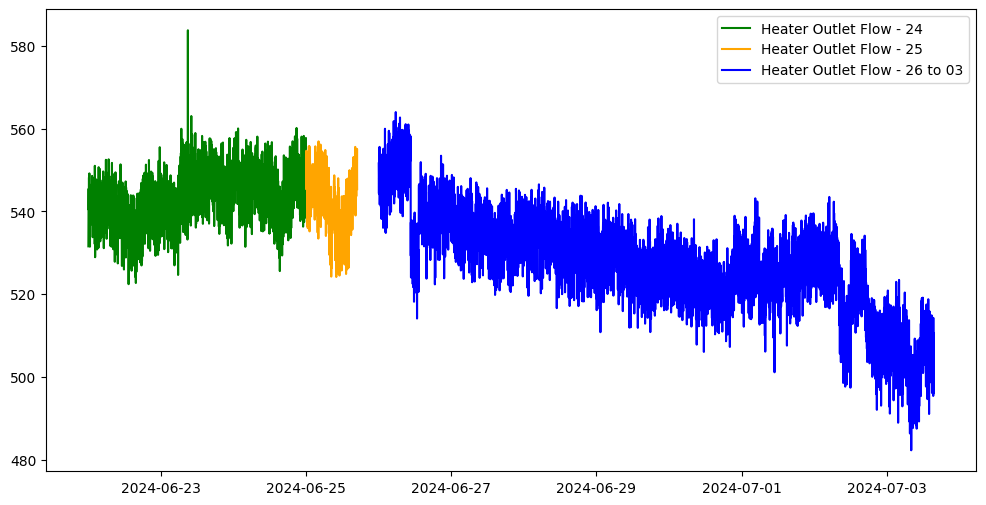

In [10]:
plt.figure(figsize=(12,6))
plt.plot(tail_df_24["Date Time"], tail_df_24["T.F Heater Outlet Flow Transmitter"], label="Heater Outlet Flow - 24", color='green')
plt.plot(tail_df_25["Date Time"], tail_df_25["T.F Heater Outlet Flow Transmitter"], label="Heater Outlet Flow - 25", color='orange')
plt.plot(df_2["Date Time"], df_2["T.F Heater Outlet Flow Transmitter"], label="Heater Outlet Flow - 26 to 03", color='blue')
plt.legend()
plt.show()